In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np


train_data_dir =r"/content/drive/MyDrive/augmented zipten cıkarilmis/test,train,val/Train"
test_data_dir = r"/content/drive/MyDrive/augmented zipten cıkarilmis/test,train,val/Test"
val_data_dir = r"/content/drive/MyDrive/augmented zipten cıkarilmis/test,train,val/Validation"


datagen = ImageDataGenerator(rescale=1./255)


train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='sparse',
)

validation_generator = datagen.flow_from_directory(
    val_data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
)

test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="sparse",
    batch_size=32,
    shuffle=False
)


Found 28949 images belonging to 10 classes.
Found 5797 images belonging to 10 classes.
Found 3860 images belonging to 10 classes.


In [ ]:

base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


model = Flatten()(base_model.output)
model = Dense(128, activation='relu')(model)
model = Dense(10, activation='softmax')(model) 


model = Model(inputs=base_model.input, outputs=model)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


epochs = 8
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)


74836368/74836368 [==============================] - 3s 0us/step
Epoch 1/8
905/905 [==============================] - 783s 718ms/step - loss: 2.3944 - accuracy: 0.3557 - val_loss: 2.3247 - val_accuracy: 0.1092
Epoch 2/8
905/905 [==============================] - 629s 695ms/step - loss: 1.0301 - accuracy: 0.6821 - val_loss: 0.9378 - val_accuracy: 0.7295
Epoch 3/8
905/905 [==============================] - 626s 692ms/step - loss: 0.8790 - accuracy: 0.7430 - val_loss: 15.6947 - val_accuracy: 0.1047
Epoch 4/8
905/905 [==============================] - 625s 691ms/step - loss: 0.7119 - accuracy: 0.7906 - val_loss: 0.9257 - val_accuracy: 0.7338
Epoch 5/8
905/905 [==============================] - 624s 690ms/step - loss: 0.7373 - accuracy: 0.7778 - val_loss: 2.1444 - val_accuracy: 0.3845
Epoch 6/8
905/905 [==============================] - 624s 689ms/step - loss: 0.8755 - accuracy: 0.7157 - val_loss: 7.8305 - val_accuracy: 0.1016
Epoch 7/8
905/905 [==============================] - 623s 688ms/

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/augmentedwithdesnet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/Shareddrives/yeni derin öğrenme ortak drive/augmentedwithdesnet.h5'  
loaded_model = load_model(model_path)


In [1]:
epoch_data = {
    'epoch': [1, 2, 3, 4, 5, 6, 7, 8],
    'duration': [783, 629, 626, 625, 624, 624, 623, 621],  
    'train_loss': [2.3944, 1.0301, 0.8790, 0.7119, 0.7373, 0.8755, 0.9168, 0.4878],
    'train_accuracy': [0.3557, 0.6821, 0.7430, 0.7906, 0.7778, 0.7157, 0.6963, 0.8404],
    'val_loss': [2.3247, 0.9378, 15.6947, 0.9257, 2.1444, 7.8305, 0.8127, 0.3998],
    'val_accuracy': [0.1092, 0.7295, 0.1047, 0.7338, 0.3845, 0.1016, 0.7509, 0.8654]
}


import pandas as pd
df = pd.DataFrame(epoch_data)


print(df)

   epoch  duration  train_loss  train_accuracy  val_loss  val_accuracy
0      1       783      2.3944          0.3557    2.3247        0.1092
1      2       629      1.0301          0.6821    0.9378        0.7295
2      3       626      0.8790          0.7430   15.6947        0.1047
3      4       625      0.7119          0.7906    0.9257        0.7338
4      5       624      0.7373          0.7778    2.1444        0.3845
5      6       624      0.8755          0.7157    7.8305        0.1016
6      7       623      0.9168          0.6963    0.8127        0.7509
7      8       621      0.4878          0.8404    0.3998        0.8654


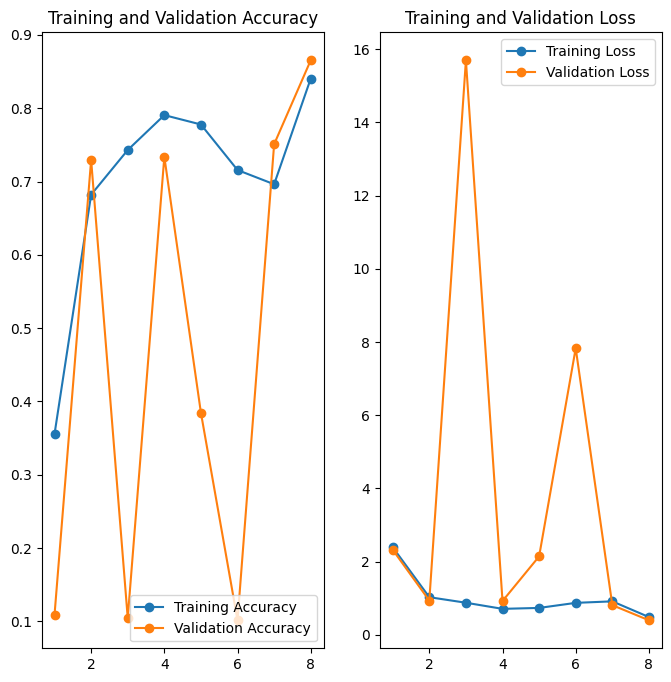

In [12]:
import matplotlib.pyplot as plt

epoch_data = {
    'epoch': [1, 2, 3, 4, 5, 6, 7, 8],
    'loss': [2.3944, 1.0301, 0.8790, 0.7119, 0.7373, 0.8755, 0.9168, 0.4878],
    'accuracy': [0.3557, 0.6821, 0.7430, 0.7906, 0.7778, 0.7157, 0.6963, 0.8404],
    'val_loss': [2.3247, 0.9378, 15.6947, 0.9257, 2.1444, 7.8305, 0.8127, 0.3998],
    'val_accuracy': [0.1092, 0.7295, 0.1047, 0.7338, 0.3845, 0.1016, 0.7509, 0.8654]
}

epochs_range = epoch_data['epoch']
acc = epoch_data['accuracy']
val_acc = epoch_data['val_accuracy']
loss = epoch_data['loss']
val_loss = epoch_data['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


121/121 [==============================] - 906s 7s/step - loss: 0.3996 - accuracy: 0.8598
Test accuracy: 0.8598445653915405
121/121 [==============================] - 855s 7s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       396
           1       0.99      0.92      0.96       379
           2       0.98      0.59      0.73       388
           3       0.80      0.94      0.87       386
           4       0.70      0.88      0.78       386
           5       0.88      0.93      0.90       384
           6       0.79      0.91      0.84       392
           7       0.86      0.65      0.74       379
           8       0.86      0.98      0.92       386
           9       0.96      0.81      0.88       384

    accuracy                           0.86      3860
   macro avg       0.87      0.86      0.86      3860
weighted avg       0.87      0.86      0.86      3860

Overall Precision: 0.87
Overall Recall

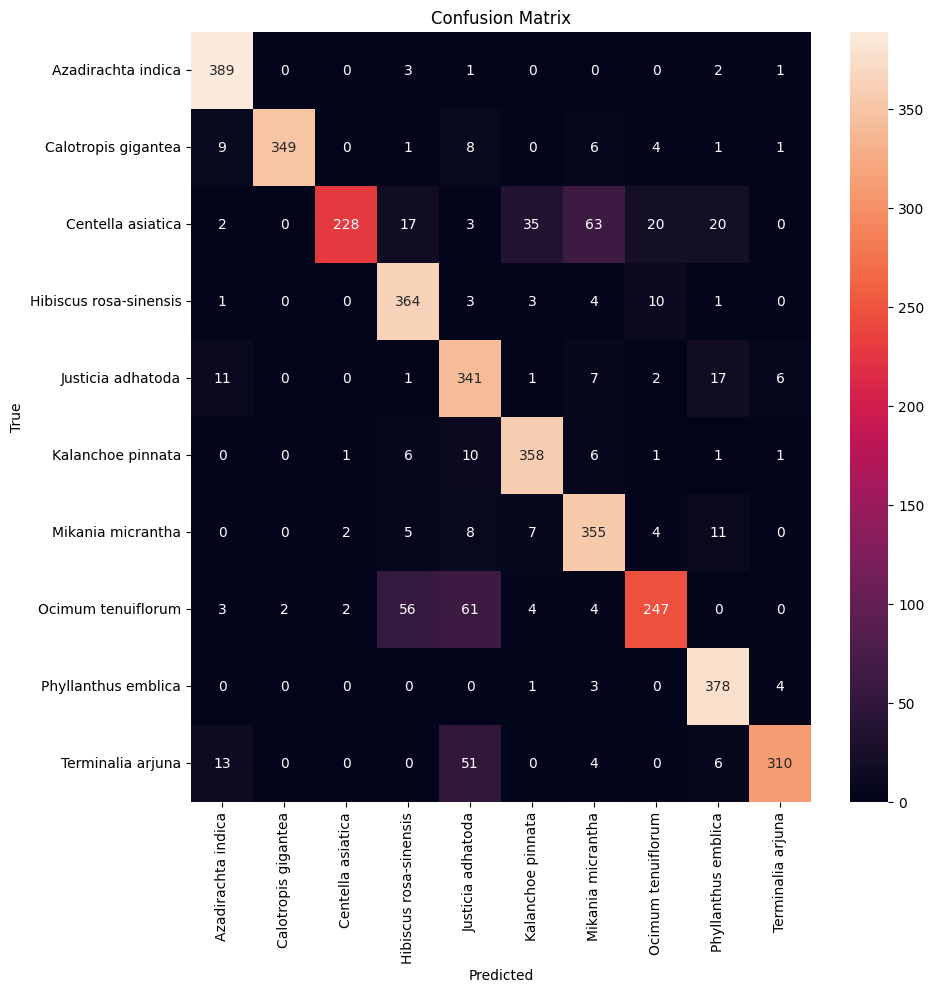

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


test_loss, test_acc = loaded_model.evaluate(test_generator)
print('Test accuracy:', test_acc)


y_pred = loaded_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes


precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')


print('Classification Report:')
print(classification_report(y_true, y_pred_classes))


print(f'Overall Precision: {precision:.2f}')
print(f'Overall Recall: {recall:.2f}')
print(f'Overall F1-score: {f1:.2f}')


cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()